In [1]:
import pandas as pd
import numpy as np

In [29]:
store_df = pd.read_excel('store.xls')
store_df.head(6)

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13
5,2014-10-06,5


In [30]:
store_df.set_index(pd.to_datetime(store_df.Date), inplace=True)

In [31]:
store_df.drop('Date', axis=1, inplace=True)

In [7]:
store_df[0:5]

,demand
Date,
2014-10-01,15
2014-10-02,7
2014-10-03,8
2014-10-04,10
2014-10-05,13


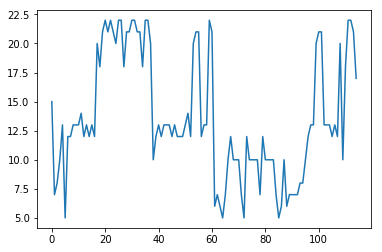

In [4]:
import matplotlib.pyplot as plt
plt.plot(store_df['demand'])

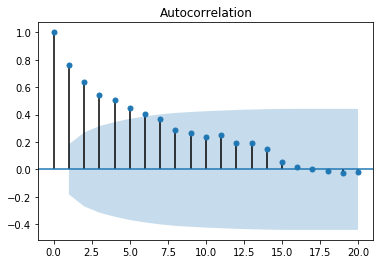

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(store_df.demand, lags=20)

Slow decline of auto correlations for different lags indicates that the series is not stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4], index=['Test Statistic','p-value','Lags Used','Number of observations used'])
    print(adfuller_out)

In [25]:
adfuller_test(store_df.demand)

Test Statistic                  -1.649533
p-value                          0.457284
Lags Used                       13.000000
Number of observations used    101.000000
dtype: float64


p-value is more than 0.05. Hence the series is not stationary.

# Deferencing

In [32]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)
store_df[0:5]

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.0
2014-10-03,8,1.0
2014-10-04,10,2.0
2014-10-05,13,3.0


In [33]:
store_df_diff = store_df.dropna()
store_df_diff

,demand,demand_diff
Date,,
2014-10-02,7,-8.0
2014-10-03,8,1.0
2014-10-04,10,2.0
2014-10-05,13,3.0
2014-10-06,5,-8.0
2014-10-07,12,7.0
2014-10-08,12,0.0
2014-10-09,13,1.0
2014-10-10,13,0.0


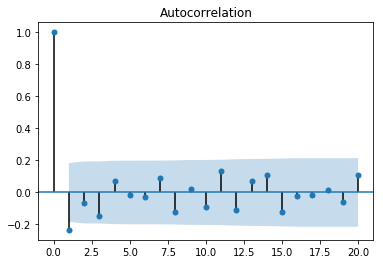

In [34]:
acf_plot = plot_acf(store_df_diff.demand_diff, lags=20)

In [ ]:
No slow reduction in autocorrelation. So for lag=1, the partial acf is signicant.

In [35]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [37]:
#p,d,q 0,0,1
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(store_train.demand.astype(np.float64).as_matrix(), order=(1,1,1))
arima_model = arima.fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [39]:
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:              ARIMA            BIC:                 532.1510
Dependent Variable: D.y              Log-Likelihood:      -256.89 
Date:               2020-02-01 04:52 Scale:               1.0000  
No. Observations:   99               Method:              css-mle 
Df Model:           3                Sample:              1       
Df Residuals:       96                                    0       
Converged:          1.0000           S.D. of innovations: 3.237   
No. Iterations:     10.0000          HQIC:                525.971 
AIC:                521.7706                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.0357    0.1599   0.2232  0.8238  -0.2776   0.3490
ar.L1.D.y       0.4058    0.2294   1.7695  0.0800  -0.0437   0.8554
ma.L1.D.y      -0.7155    0.1790  -3.9972  0.0001  -1.0663  -0.3647
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.4641             0.0000           2.4641             0.0000
MA.1          1.3977             0.0000           1.3977             0.0000
==================================================================

"""

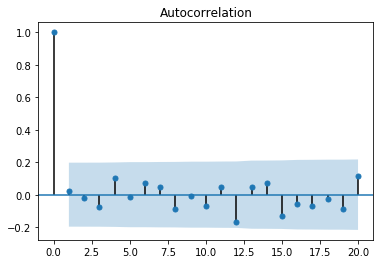

In [40]:
acf_plot = plot_acf(arima_model.resid, lags=20)

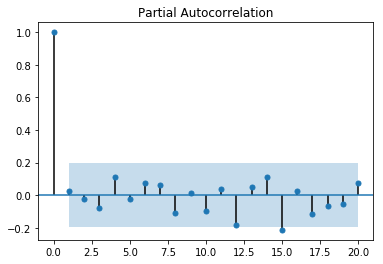

In [41]:
pacf_plot = plot_pacf(arima_model.resid, lags=20)

In [42]:
store_predict, stderr, ci = arima_model.forecast(steps=15)
store_predict

array([17.32364921, 16.2586989 , 15.84771025, 15.70212168, 15.66424158,
       15.67007328, 15.69364473, 15.72441558, 15.75810818, 15.79298655,
       15.82834613, 15.863901  , 15.89953513, 15.93520143, 15.97088078])

In [43]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual- predicted)/actual)) * 100,2)

In [46]:
get_mape(store_df.demand[100:],store_predict)

24.17

The ARIMA model with first-order differencing gives forecast acuracy of 24.17 